# ML Simple Linear Regression/MLR/PR

# STEP 1: Business Probelm Understanding

In [1]:
#Identify the relationship between total advertising spend and sales.
#Our Next add campaign will have a total spend of $200,000, how many 
#units do we expect to sell as a result of this?

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# STEP 2: Data Understanding

In [3]:
#2.1 Data Collection

In [4]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#If someone want to spend a total of $2000, what would be expected sales be

In [7]:
df['total_spend'] = df['TV'] + df['Radio']+df['Newspaper']
df.head()

,TV,Radio,Newspaper,Sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,12.0,132.4
3,151.5,41.3,58.5,16.5,251.3
4,180.8,10.8,58.4,17.9,250.0


In [8]:
df.drop(columns=['TV','Radio','Newspaper'],inplace=True)
df.head()

,Sales,total_spend
0,22.1,337.1
1,10.4,128.9
2,12.0,132.4
3,16.5,251.3
4,17.9,250.0


# STEP 3.Data Preprocessing

In [9]:
#3.1 EDA Exploratory Data Analysis

In [10]:
df.describe()

,Sales,total_spend
count,200.000000,200.000000
mean,15.130500,200.860500
std,5.283892,92.985181
min,1.600000,11.700000
25%,11.000000,123.550000
50%,16.000000,207.350000
75%,19.050000,281.125000
max,27.000000,433.600000


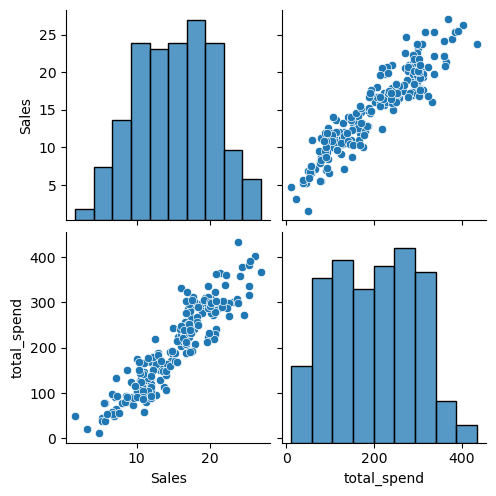

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
df.corr()

,Sales,total_spend
Sales,1.000000,0.924917
total_spend,0.924917,1.000000


In [13]:
#3.2 Data Claening

df.isnull().sum()

Sales          0
total_spend    0
dtype: int64

In [14]:
#3.3 Data Wrangling
#No encoding is require

In [15]:
# 3.4 : Train-Test Split


In [16]:
#creat X and Y
#Taking only one variable for now

X=df.drop(columns='Sales')
y=df['Sales']


In [17]:
import sklearn

In [18]:
pip install --upgrade scikit_learn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# STEP 4.Modelling

In [20]:
#Modelling with default parameters

In [21]:
#import
from sklearn.linear_model import LinearRegression

In [22]:
#Save the model
model=LinearRegression()

In [23]:
#fit
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Print intercept(b0)
model.intercept_

4.7653139202885395

In [25]:
#print coef(b1)
model.coef_

array([0.05253329])

In [26]:
#Predictions

In [27]:
train_predictions=model.predict(X_train)

In [28]:
test_predictions=model.predict(X_test)

# STEP 5.Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data: ",mean_absolute_error(y_test,test_predictions))
print("MAE for train data: ",mean_absolute_error(y_train,train_predictions))

MAE for test data:  1.6665935124129527
MAE for train data:  1.5242208933379047


In [30]:
from sklearn.metrics import mean_squared_error
print("MSE for test data: ",mean_squared_error(y_test,test_predictions))
print("MSE for train data: ",mean_squared_error(y_train,train_predictions))

MSE for test data:  4.751599394081775
MSE for train data:  3.7042040794944557


In [31]:
print("RMSE for test data: ",np.sqrt(mean_squared_error(y_test,test_predictions)))
print("RMSE for train data: ",np.sqrt(mean_squared_error(y_train,train_predictions)))

RMSE for test data:  2.1798163670552104
RMSE for train data:  1.9246308943520718


In [32]:
from sklearn.metrics import r2_score
print("R2 for test data: ",r2_score(y_test,test_predictions))
print("R2 for train data: ",r2_score(y_train,train_predictions))

R2 for test data:  0.8309969955285723
R2 for train data:  0.8578526798828715


In [33]:
#Test R-Square
model.score(X_test,y_test)

0.8309969955285723

In [34]:
#Train R-Square
model.score(X_train,y_train)

0.8578526798828715

# checkList

In [35]:
#checkList
#Check the model overfitting or underfitting problem
#Test Accuracy=Cross Validation Scorez


In [36]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,y,cv=5)
print(scores)

cv_score = scores.mean()
print("Cross Validation Score: ",cv_score)

[0.84995313 0.89982582 0.87434003 0.78708779 0.83491392]
Cross Validation Score:  0.8492241389757677


In [37]:
#Check for Assumptions

In [38]:
#1.Linearity of Error

In [39]:
test_res=y_test-test_predictions

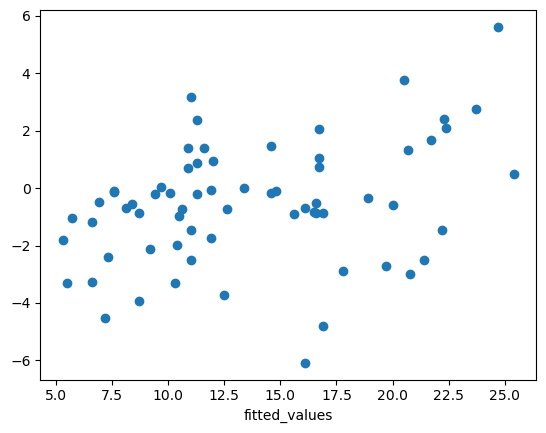

In [40]:
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.xlabel("fitted_values")
plt.show()


In [41]:
#Normality of Error

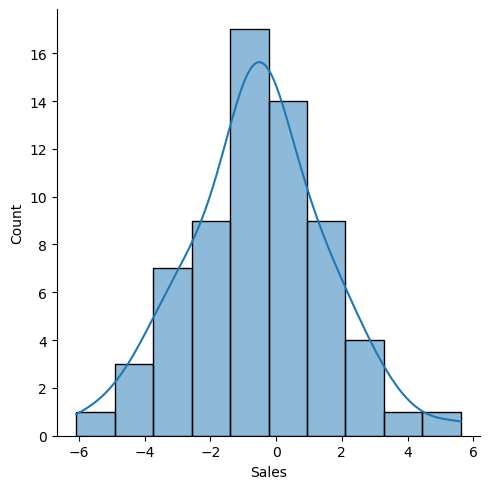

In [42]:
sns.displot(test_res,kde=True)

#plt.hist(test_res)
plt.show()

In [43]:
#Equal Variance of Error(Homoscadesicity)


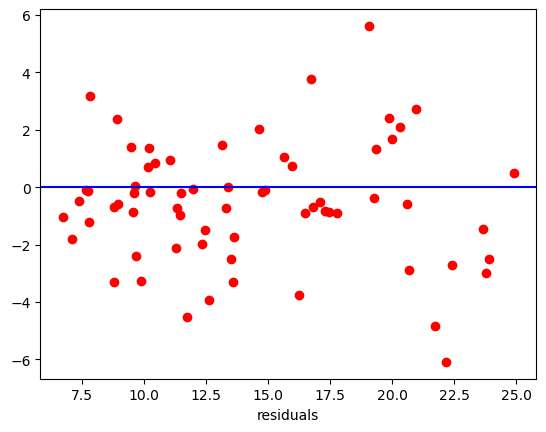

In [44]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.xlabel("residuals")
plt.show()


In [45]:
#Variable significance

In [46]:
import statsmodels.formula.api as smf
model2=smf.ols("y~X",data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1172.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           4.19e-85
Time:                        14:21:02   Log-Likelihood:                -422.79
No. Observations:                 200   AIC:                             849.6
Df Residuals:                     198   BIC:                             856.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.5736      0.340     13.465      0.000       3.904       5.243
X              0.0526      0.002     34.234      0.000       0.050       0.056
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.117
Skew:                           0.001   Prob(JB):                        0.943
Kurtosis:                       3.119   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# STEP 6: Final Inferences

In [47]:
model.predict([[321400]])

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16888.96395708])

# Save a Model

In [48]:
from joblib import dump

In [49]:
dump(model,'sales_model.joblib')

['sales_model.joblib']

# Load a Model

In [50]:
from joblib import load

In [51]:
loaded_model=load('sales_model.joblib')

In [52]:
loaded_model.predict([[2000]])

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([109.83188917])

# MLR CODE (Multiple Linear Regression) Model

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Business Problem Understanding

#What is the relationship between  each advertising channel(TV,News Paper,Radio) and sales?

# Data Collection

In [54]:
df=pd.read_csv("Advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [56]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# EDA Exploratory Data Analysis

In [57]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


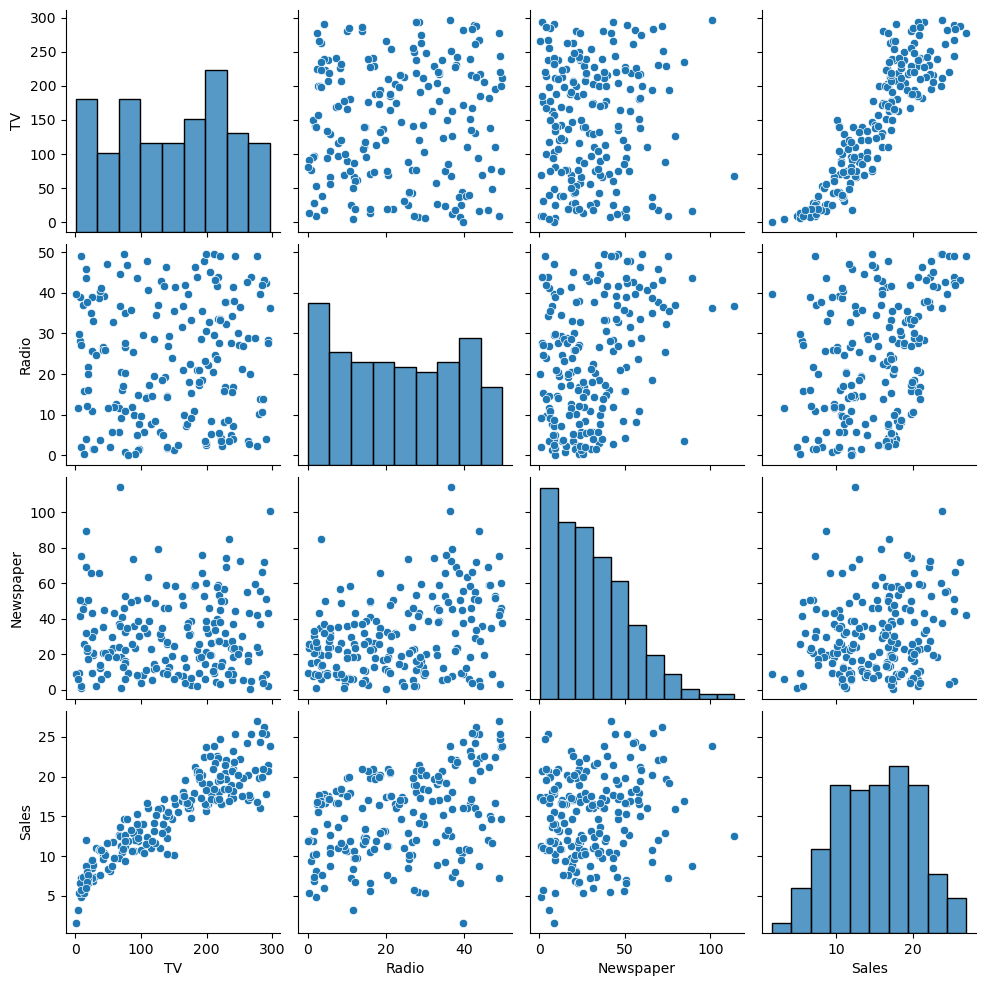

In [58]:
sns.pairplot(df)
plt.show()

In [59]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [60]:
#3.1 Data Cleaning

In [61]:
#3.2 Data Wrangling

In [62]:
#Train-Test Split

In [63]:
P=df.drop(columns='Sales')
q=df['Sales']


In [64]:
from sklearn.model_selection import train_test_split
P_train,P_test,q_train,q_test=train_test_split(P,q,test_size=0.33,random_state=42)

# Step 4 :Modelling

In [65]:
from sklearn.linear_model import LinearRegression #import

model=LinearRegression() #instantiate

model.fit(P_train,q_train) #fit

LinearRegression()

In [66]:
model.intercept_

4.7979929855286265

In [67]:
model.coef_

array([0.05378717, 0.10027874, 0.00789845])

In [68]:
#Predictions

In [69]:
train_predictions=model.predict(P_train)

In [70]:
test_predictions=model.predict(P_test)

# Step 5: Evaluation Metrics

In [71]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(q_test,test_predictions))
train_RMSE=np.sqrt(mean_squared_error(q_train,train_predictions))
print(train_RMSE,test_RMSE)

1.6653807942032557 1.6501109302183186


In [72]:
model.score(P_train,q_train) #Train R2

0.8935683305189493

In [73]:
model.score(P_test,q_test) #Test R2

0.9031541781049791

# checkList
#Check the model overfitting or underfitting problem
#Test Accuracy=Cross Validation Scorez


In [74]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,P,q,cv=5)
print(scores)
scores.mean()

[0.87556263 0.93177791 0.92150403 0.84554586 0.90247132]


0.8953723525274103

In [75]:
#ChecK for Assumptions

In [76]:
#1.Linearity of Error

In [77]:
test_res=q_test-test_predictions

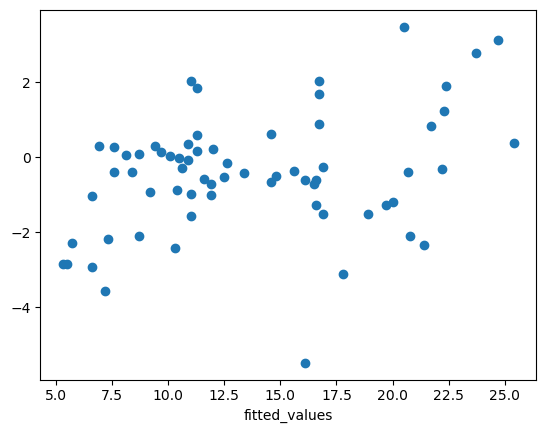

In [78]:
plt.scatter(q_test,test_res)
plt.xlabel("observed_values")
plt.xlabel("fitted_values")
plt.show()

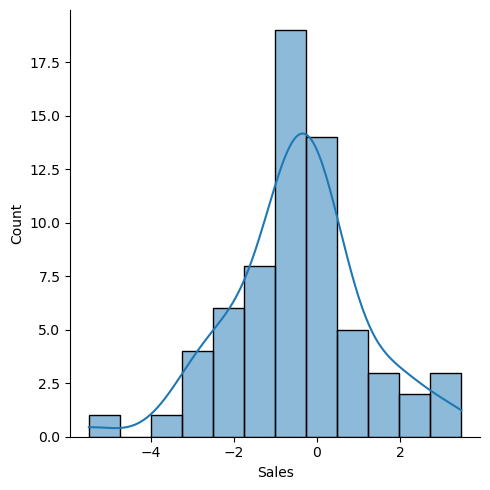

In [79]:
#Normality of Error
sns.displot(test_res,kde=True)

#plt.hist(test_res)
plt.show()

In [80]:
#Equal Variance of Error(Homoscadesicity)

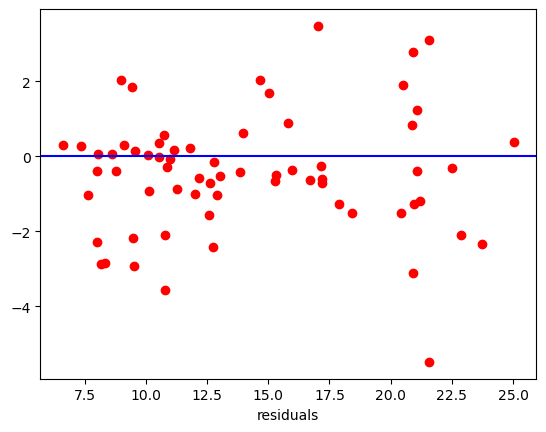

In [81]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.xlabel("residuals")
plt.show()

In [82]:
#Variable significance

In [83]:
import statsmodels.formula.api as smf
model1=smf.ols("q~P",data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 05 Jan 2024   Prob (F-statistic):           8.13e-99
Time:                        14:21:07   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
P[0]           0.0544      0.001     39.592      0.000       0.052       0.057
P[1]           0.1070      0.008     12.604      0.000       0.090       0.124
P[2]           0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

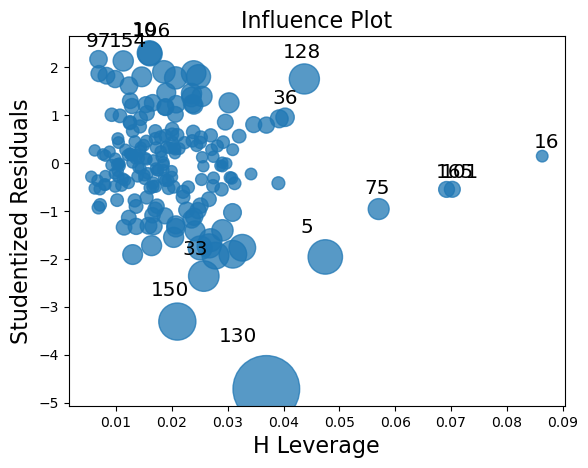

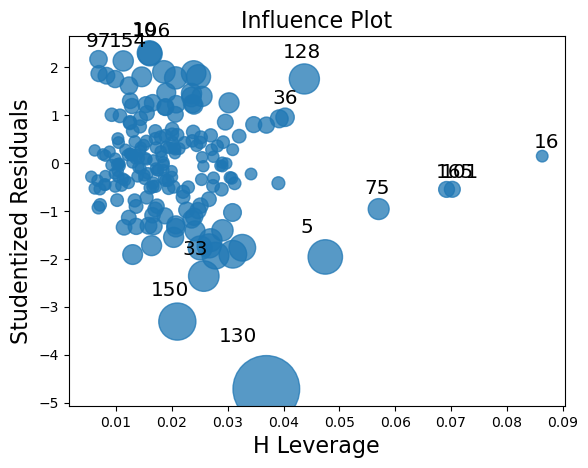

In [84]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)

In [85]:
df.iloc[130]

TV            0.7
Radio        39.6
Newspaper     8.7
Sales         1.6
Name: 130, dtype: float64

In [86]:
df_new=df.drop(df.index[[130]],axis=0)
df_new

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [87]:
lm=smf.ols(formula='Sales~TV+Radio+Newspaper',data=df_new).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          1.87e-101
Time:                        14:21:09   Log-Likelihood:                -371.18
No. Observations:                 199   AIC:                             750.4
Df Residuals:                     195   BIC:                             763.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7527      0.293     16.202      0.000       4.174       5.331
TV             0.0537      0.001     40.789      0.000       0.051       0.056
Radio          0.1114      0.008     13.727      0.000       0.095       0.127
Newspaper     -0.0023      0.006     -0.420      0.675      -0.013       0.009
==============================================================================
Omnibus:                        0.785   Durbin-Watson:                   2.332
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.467
Skew:                          -0.036   Prob(JB):                        0.792
Kurtosis:                       3.226   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#Variance Inflation Factor

In [89]:
#Calculating VIF's values of independent variables
rsq_TV=smf.ols('TV~Radio+Newspaper',data=df).fit()
rsq_TV.summary()

#Calculating VIF'S values of independent variables
rsq_TV=smf.ols('TV~Radio+Newspaper',data=df).fit().rsquared
vif_TV=1/(1-rsq_TV)

rsq_Radio=smf.ols('Radio~TV+Newspaper',data=df).fit().rsquared
vif_Radio=1/(1-rsq_Radio)

rsq_Newspaper=smf.ols('Newspaper~Radio+TV',data=df).fit().rsquared
vif_Newspaper=1/(1-rsq_Newspaper)

In [90]:
#Storing VIF Values in a data frame

In [91]:
d1={'Variables':['TV','Radio','Newspaper'],'VIF':[vif_TV,vif_Radio,vif_Newspaper]}
Vif_frame=pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,TV,1.004611
1,Radio,1.144952
2,Newspaper,1.145187


In [92]:
#If VIF>4 drop that independent variable

In [93]:
#AV PLOT

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


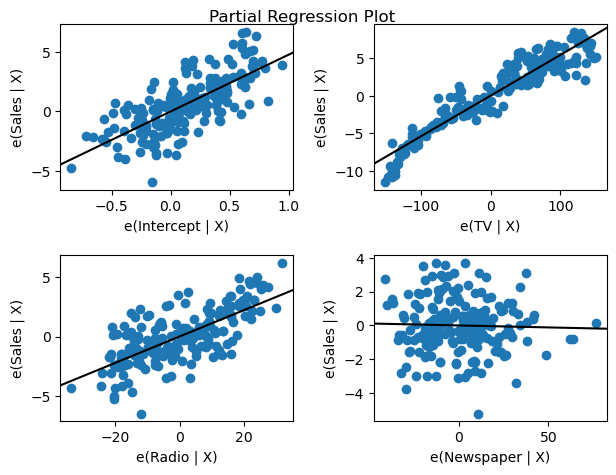

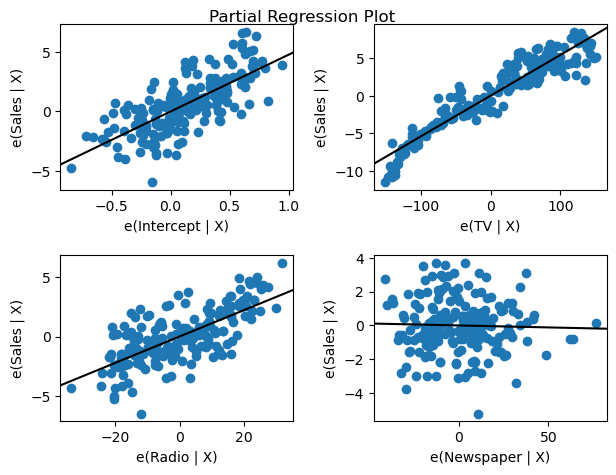

In [94]:
sm.graphics.plot_partregress_grid(lm)

# Final Model including TV & Radio only

In [95]:
final_model=smf.ols(formula='Sales~TV+Radio',data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Fri, 05 Jan 2024   Prob (F-statistic):          2.39e-100
Time:                        14:21:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6309      0.290     15.952      0.000       4.058       5.203
TV             0.0544      0.001     39.726      0.000       0.052       0.057
Radio          0.1072      0.008     13.522      0.000       0.092       0.123
==============================================================================
Omnibus:                       16.227   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.973
Skew:                          -0.434   Prob(JB):                     8.43e-07
Kurtosis:                       4.613   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression PR Or Non-Linear Regression :

# BUSINESS PROBLEM UNDERSTANDING

In [96]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
df=pd.read_csv("Advertising.csv")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# EDA

In [99]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


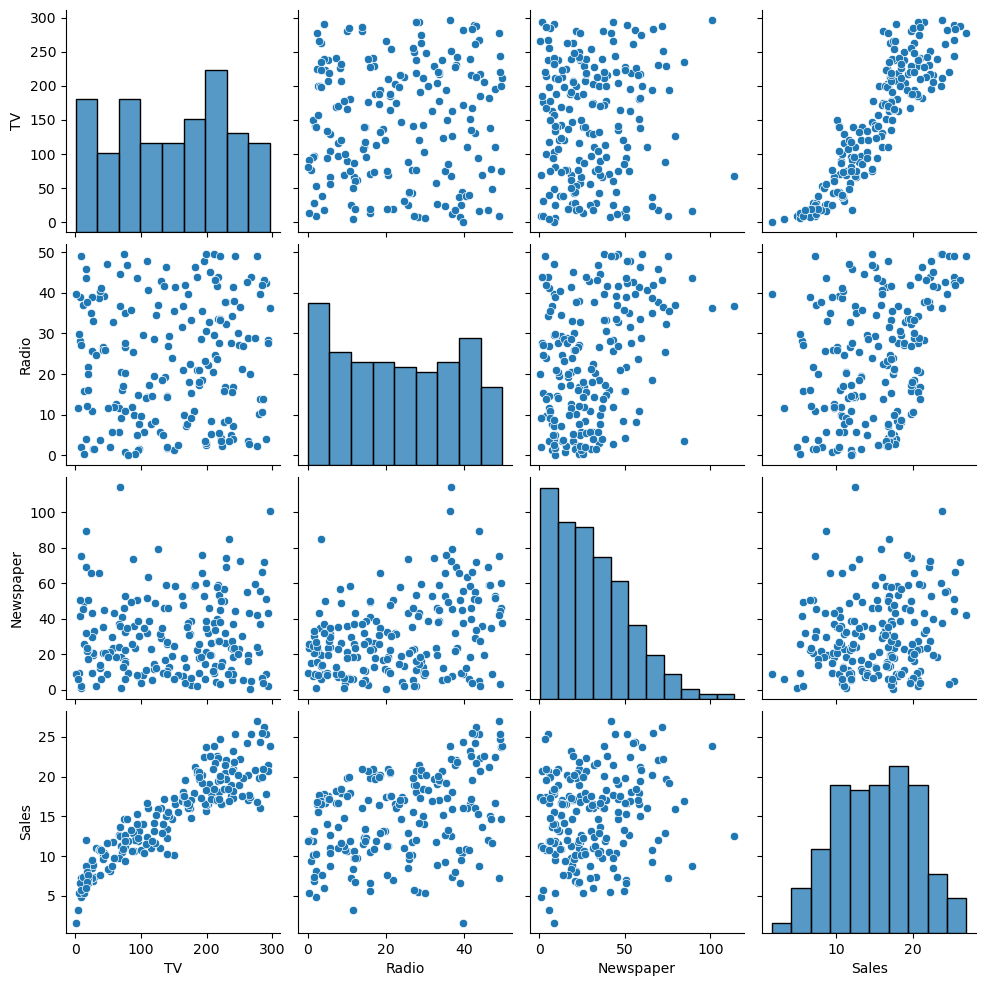

In [100]:
sns.pairplot(df)
plt.show()

In [101]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [102]:
#C=df[['Tv','radio','Newspaper']]
#d=df['sales']

In [103]:
C=df.drop('Sales',axis=1)
d=df['Sales']

In [104]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

C_poly=polynomial_converter.fit_transform(C)

C_poly=pd.DataFrame(C_poly)

In [105]:
from sklearn.model_selection import train_test_split
C_train, C_test, d_train, d_test=train_test_split(C_poly,d,test_size=0.3,random_state=45)

In [106]:
C_train

,0,1,2,3,4,5,6,7,8
74,213.4,24.6,13.1,45539.56,5249.64,2795.54,605.16,322.26,171.61
113,209.6,20.6,10.7,43932.16,4317.76,2242.72,424.36,220.42,114.49
76,27.5,1.6,20.7,756.25,44.00,569.25,2.56,33.12,428.49
115,75.1,35.0,52.7,5640.01,2628.50,3957.77,1225.00,1844.50,2777.29
90,134.3,4.9,9.3,18036.49,658.07,1248.99,24.01,45.57,86.49
...,...,...,...,...,...,...,...,...,...
95,163.3,31.6,52.9,26666.89,5160.28,8638.57,998.56,1671.64,2798.41
32,97.2,1.5,30.0,9447.84,145.80,2916.00,2.25,45.00,900.00
124,229.5,32.3,74.2,52670.25,7412.85,17028.90,1043.29,2396.66,5505.64
131,265.2,2.9,43.0,70331.04,769.08,11403.60,8.41,124.70,1849.00


In [107]:
d_train

74     17.0
113    20.9
76      6.9
115    12.6
90     14.0
       ... 
95     16.9
32     13.2
124    19.7
131    17.7
158     7.3
Name: Sales, Length: 140, dtype: float64

# Model Fitting on Polynomial Data

In [108]:
from sklearn.linear_model import LinearRegression #import

model=LinearRegression() #instantiate

model.fit(C_train,d_train) #fit

LinearRegression()

In [109]:
model.intercept_

4.839424462344018

In [110]:
model.coef_

array([ 8.30262956e-02, -4.41705093e-02, -3.46501275e-03, -1.27177715e-04,
        4.24975607e-04, -4.07085349e-05,  1.86875837e-03,  6.12119982e-05,
        1.10796366e-04])

# Predictions

In [111]:
train_pred=model.predict(C_train)
test_pred=model.predict(C_test)

# Evaluation

In [112]:
model.score(C_train,d_train)#Train R2

0.9448371672488137

In [113]:
model.score(C_test,d_test)#Test R2

0.9017448226311153

# Evaluation & CheckList

In [114]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,C_poly,d,cv=5)
print(scores)
scores.mean()

[0.92237126 0.95031097 0.92210562 0.89791394 0.93421387]


0.9253831326253603

In [115]:
from sklearn.metrics import mean_squared_error
test_RMSE=np.sqrt(mean_squared_error(d_test,test_pred))
train_RMSE=np.sqrt(mean_squared_error(d_train,train_pred))
print(train_RMSE,test_RMSE)

1.2675017810498777 1.521998022709716


In [116]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

C_poly=polynomial_converter.fit_transform(C)

C_train, C_test, d_train, d_test=train_test_split(C_poly,d,test_size=0.3,random_state=45)

model=LinearRegression()
model.fit(C_train,d_train)

train_pred=model.predict(C_train)
test_pred=model.predict(C_test)

print(model.score(C_train,d_train)) #Train r2
print(model.score(C_test,d_test)) #Test r2


0.9448371672488137
0.9017448226311153


# Choosing a Model

# Bias-Variance Tradeoff

In [117]:
train_rmse_errors=[]
test_rmse_errors=[]

for i in range(1,10):
    polynomial_converter=PolynomialFeatures(degree=i,include_bias=False)
    C_poly=polynomial_converter.fit_transform(C)
    
    C_train,C_test,d_train,d_test=train_test_split(C_poly,d,test_size=0.3,random_state=45)
    model=LinearRegression()
    model.fit(C_train,d_train)
    
    train_pred=model.predict(C_train)
    test_pred=model.predict(C_test)
    
    train_RMSE=np.sqrt(mean_squared_error(d_train,train_pred))
    train_rmse_errors.append(train_RMSE)
    
    test_RMSE=np.sqrt(mean_squared_error(d_test,test_pred))
    test_rmse_errors.append(test_RMSE)
    

In [118]:
train_rmse_errors

[1.6423627587868843,
 1.2675017810498777,
 1.235102645309074,
 1.0347405256040527,
 0.8684383466156387,
 0.7194242089724171,
 7.8282539441825465,
 0.402855660302021,
 0.28385054117098957]

In [119]:
test_rmse_errors

[1.6870321374620092,
 1.521998022709716,
 1.4365291098467845,
 1.5585188685034828,
 1.516585715763374,
 3.3888773092676305,
 82.51622608731154,
 319.13269193565355,
 1529.237945610034]

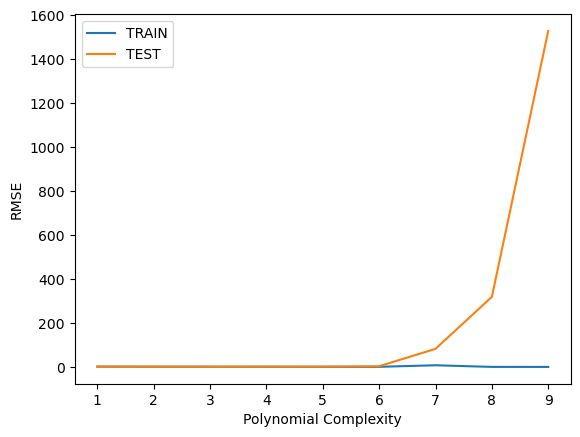

In [120]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN')
plt.plot(range(1,10),test_rmse_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()
plt.show()

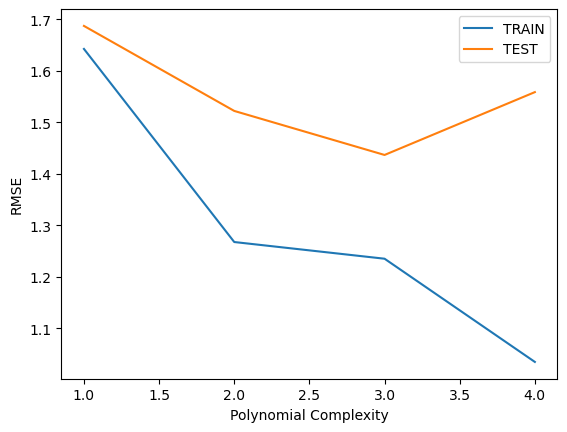

In [121]:
plt.plot(range(1,5),train_rmse_errors[:4],label='TRAIN')
plt.plot(range(1,5),test_rmse_errors[:4],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()


# Finalizing the Model

In [123]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

C_poly=final_poly_converter.fit_transform(C)

C_train,C_test,d_train,d_test=train_test_split(C_poly, d, test_size=0.3,random_state=45)

final_model=LinearRegression()
final_model.fit(C_train,d_train)

train_pred=final_model.predict(C_train)
test_pred=final_model.predict(C_test)

print("Train R2:",final_model.score(C_train,d_train)) #Train r2
print("Test R2:",final_model.score(C_test,d_test)) #Test r2

Train R2: 0.9476212044710037
Test R2: 0.9124701610376368


# Deployment

Save Model and Converter

In [124]:
from joblib import dump

In [125]:
dump(final_model,'sales_poly_model.joblib')

['sales_poly_model.joblib']

In [126]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [127]:
from joblib import load

In [128]:
loaded_poly=load('poly_converter.joblib')
loaded_model=load('sales_poly_model.joblib')

Prediction on New Data

In [129]:
campaign_poly=loaded_poly.transform([[149000,22000,12000]])
loaded_model.predict(campaign_poly)

C:\Users\vasan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([1.86949783e+09])